# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1043.
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           2.76e-42
Time:                        09:02:58   Log-Likelihood:                 4.0808
No. Observations:                  50   AIC:                           -0.1616
Df Residuals:                      46   BIC:                             7.486
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0148      0.079     63.282      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.47179202  4.93523805  5.3636895   5.7339498   6.03119393  6.25140409
  6.40202979  6.50076397  6.57263605  6.64589971  6.74739084  6.89811853
  7.10981332  7.38299988  7.70691084  8.06125582  8.4195551   8.75349013
  9.03755624  9.25325292  9.39212346  9.45714433  9.46223617  9.42997664
  9.38789104  9.36392988  9.3818768   9.4574409   9.59567582  9.79014945
 10.02400066 10.27270959 10.50812616 10.70309507 10.83591732 10.8939153
 10.87551568 10.79050794 10.65843592 10.5053869  10.35970545 10.24733658
 10.18756298 10.18983697 10.25222751 10.36173743 10.49643886 10.62907591
 10.73154275 10.77950126]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.74053244 10.58682351 10.33506615 10.02329853  9.70159227  9.41979317
  9.2153172   9.10398977  9.07617114  9.09911651]


## Plot comparison

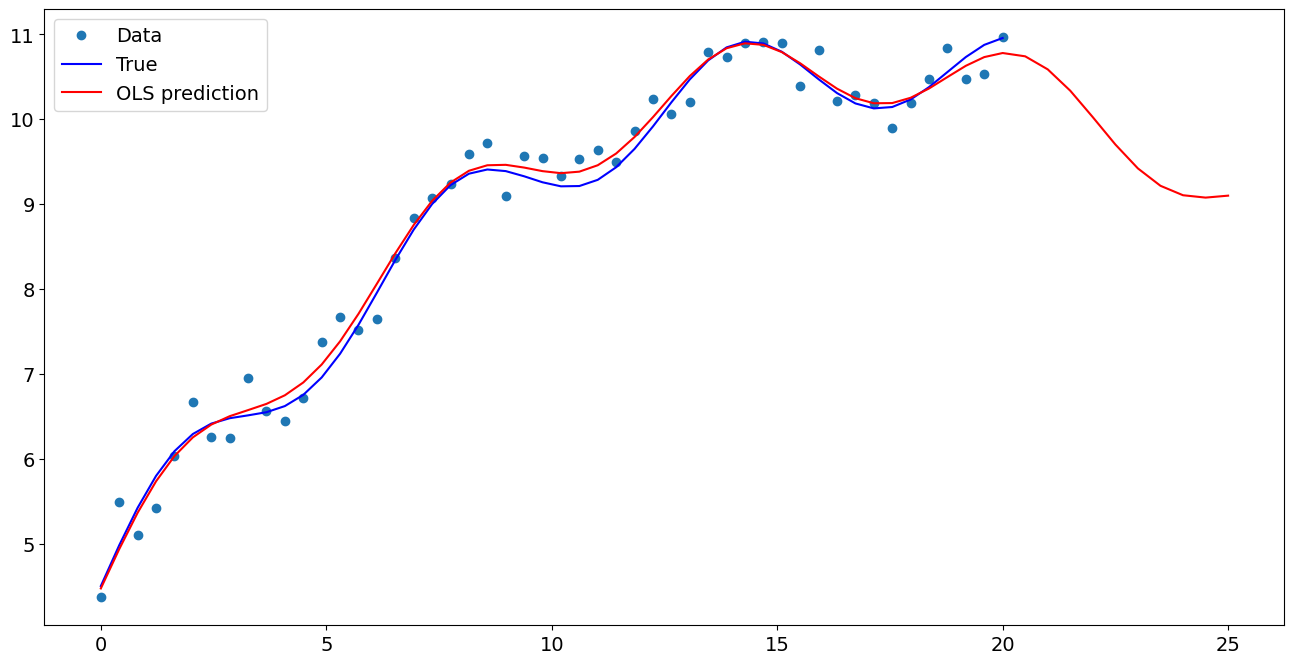

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.014843
x1                  0.513177
np.sin(x1)          0.425632
I((x1 - 5) ** 2)   -0.021722
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.740532
1    10.586824
2    10.335066
3    10.023299
4     9.701592
5     9.419793
6     9.215317
7     9.103990
8     9.076171
9     9.099117
dtype: float64